<a href="https://colab.research.google.com/github/ajinkyajumde/EDA-with-TSF/blob/main/GIVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. What is the expected forecast for Dec closure? Feel free to use time series or any predictive technique to determine the same. You may take the help of R as well. In case legacy data is needed, please feel free to make assumptions
2. An org leader feels that your conversion rates are dropping, what could be your response to the same? 
3. Do you see any discrepency in the data? How would you clean up the same?
4. What insights can you draw from here?

In [ ]:
import pandas as pd

In [ ]:
from datetime import datetime

In [ ]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                   # some useful functions
from tqdm import tqdm_notebook



%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='/content/drive/MyDrive/1644992506125_1644992504891_Excel Sample_BA (1) (1).xlsx'
df=pd.read_excel(path,header=1)

In [ ]:
df=df.drop(columns='Unnamed: 0')

In [ ]:
df.head()

,Date,New Installs,Returning Users,Uninstalls,Net new installs,Uninstall rate,DAU,Unique Page Views,Page view conversion,Add to Cart,A2C Conv,AddtoCart (Prod page),Order Comp,Overall Conv
0,2021-09-01,6012,715,2538,4738,0.422156,13421,4098,0.305342,1316,0.098055,0.321132,460,0.034275
1,2021-09-02,9327,617,2364,5725,0.253458,15858,5068,0.319586,1313,0.082797,0.259077,521,0.032854
2,2021-09-03,10415,786,1552,6222,0.149016,15832,4669,0.294909,1214,0.076680,0.260013,311,0.019644
3,2021-09-04,12312,765,2736,6258,0.222222,17144,5023,0.292989,1328,0.077462,0.264384,435,0.025373
4,2021-09-05,15719,944,3288,5532,0.209174,18753,4599,0.245241,1393,0.074281,0.302892,438,0.023356


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   112 non-null    datetime64[ns]
 1   New Installs           112 non-null    int64         
 2   Returning Users        112 non-null    int64         
 3   Uninstalls             112 non-null    int64         
 4   Net new installs       112 non-null    int64         
 5   Uninstall rate         112 non-null    float64       
 6   DAU                    112 non-null    int64         
 7   Unique Page Views      112 non-null    int64         
 8   Page view conversion   112 non-null    float64       
 9   Add to Cart            112 non-null    int64         
 10  A2C Conv               112 non-null    float64       
 11  AddtoCart (Prod page)  112 non-null    float64       
 12  Order Comp             112 non-null    int64         
 13  Overa

In [ ]:
df.describe()

,New Installs,Returning Users,Uninstalls,Net new installs,Uninstall rate,DAU,Unique Page Views,Page view conversion,Add to Cart,A2C Conv,AddtoCart (Prod page),Order Comp,Overall Conv
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,12236.267857,1075.285714,3281.258929,7384.741071,0.278487,21885.580357,6212.723214,0.285406,1618.160714,0.073822,0.260497,482.642857,0.022786
std,3901.796555,347.313043,1351.596878,2127.472373,0.102674,6146.255215,1989.873558,0.049519,610.822405,0.016065,0.044942,150.517836,0.006579
min,4709.000000,435.000000,970.000000,3416.000000,0.130152,11342.000000,3256.000000,0.163178,704.000000,0.043668,0.156836,171.000000,0.010083
25%,9519.000000,812.750000,2296.750000,5643.750000,0.193951,16480.250000,4480.750000,0.246646,1190.500000,0.062460,0.229911,367.250000,0.017611
50%,11909.000000,995.000000,3075.500000,7271.000000,0.262870,20938.000000,5707.000000,0.284797,1416.000000,0.073877,0.264091,460.000000,0.022383
75%,15049.250000,1401.000000,4096.750000,8951.000000,0.350034,26647.000000,7764.500000,0.314308,1957.000000,0.081813,0.291931,586.000000,0.026965
max,20939.000000,1766.000000,7560.000000,13164.000000,0.660862,37544.000000,11345.000000,0.409564,3434.000000,0.112963,0.359590,1053.000000,0.040838


In [ ]:
forecast_model=df[['Date','Order Comp']]

In [ ]:
forecast_model.head()

,Date,Order Comp
0,2021-09-01,460
1,2021-09-02,521
2,2021-09-03,311
3,2021-09-04,435
4,2021-09-05,438


In [ ]:
forecast_model.tail()

,Date,Order Comp
107,2021-12-17,772
108,2021-12-18,784
109,2021-12-19,588
110,2021-12-20,783
111,2021-12-21,663


<Figure size 1440x720 with 0 Axes>

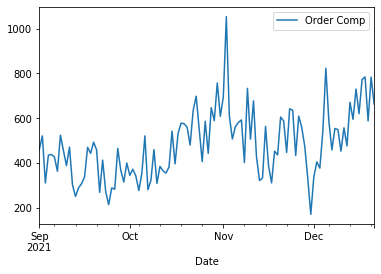

In [ ]:
plt.figure(figsize=(20,10))
forecast_model.plot(x='Date')

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(forecast_model['Order Comp'])


In [ ]:
def adfuller_test(quantity):
    result=adfuller(quantity)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(forecast_model['Order Comp'])

ADF Test Statistic : -2.594101450469276
p-value : 0.09422251630366735
#Lags Used : 2
Number of Observations Used : 109
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
forecast_model['Order Comp diff'] = forecast_model['Order Comp'] - forecast_model['Order Comp'].shift(1)

In [ ]:
forecast_model['Seasonal Order Comp diff']=forecast_model['Order Comp'] - forecast_model['Order Comp'].shift(30)

In [ ]:
forecast_model.head()

,Date,Order Comp,Order Comp diff,Seasonal Order Comp diff
0,2021-09-01,460,NaN,NaN
1,2021-09-02,521,61.0,NaN
2,2021-09-03,311,-210.0,NaN
3,2021-09-04,435,124.0,NaN
4,2021-09-05,438,3.0,NaN


In [ ]:
## Again test dickey fuller test
adfuller_test(forecast_model['Order Comp diff'].dropna())

ADF Test Statistic : -6.755994635637674
p-value : 2.8708915962385677e-09
#Lags Used : 7
Number of Observations Used : 103
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
## Again test dickey fuller test
adfuller_test(forecast_model['Seasonal Order Comp diff'].dropna())

ADF Test Statistic : -3.3267710087376825
p-value : 0.013723404252347865
#Lags Used : 1
Number of Observations Used : 80
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


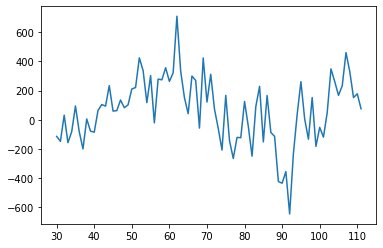

In [ ]:
forecast_model['Seasonal Order Comp diff'].plot()

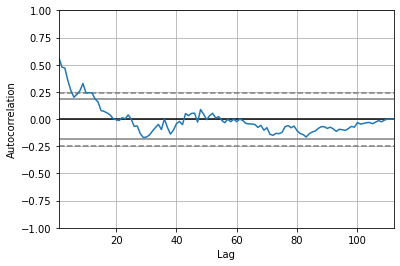

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(forecast_model['Order Comp'])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

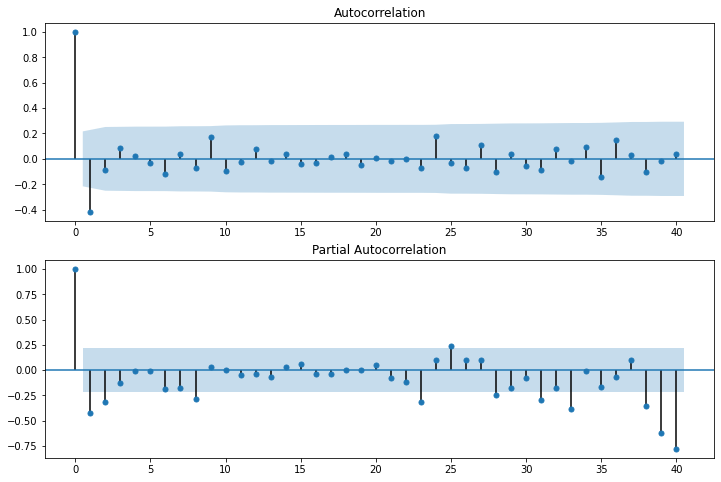

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(forecast_model['Order Comp diff'].iloc[30:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(forecast_model['Order Comp diff'].iloc[30:],lags=40,ax=ax2)

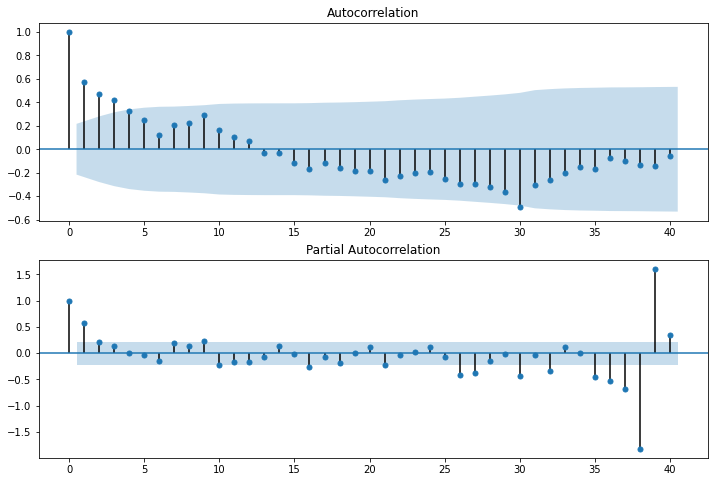

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(forecast_model['Seasonal Order Comp diff'].iloc[30:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(forecast_model['Seasonal Order Comp diff'].iloc[30:],lags=40,ax=ax2)

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [ ]:
model=SARIMAX(forecast_model['Order Comp'],order=(1, 1, 2),seasonal_order=(1,1,2,30))
results=model.fit()



/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


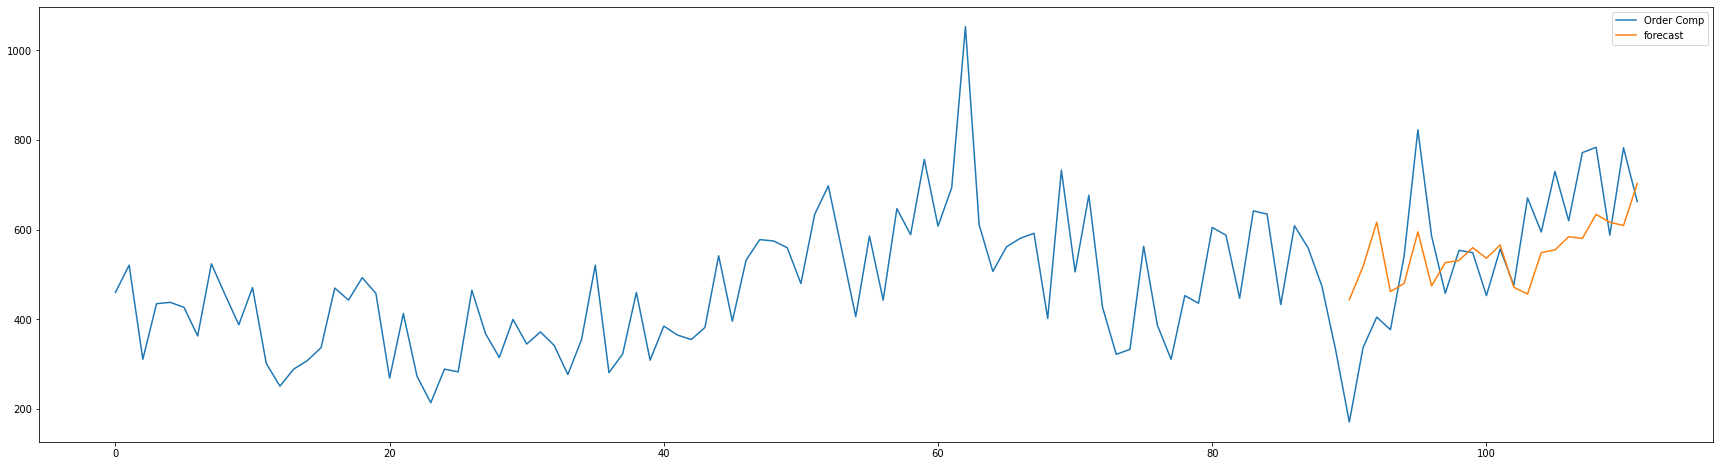

In [ ]:
forecast_model['forecast']=results.predict(start=90
                              ,end=120,dynamic=True)
forecast_model[['Order Comp','forecast']].plot(figsize=(30,8)) 

In [ ]:
forecast_model.tail(50)

,Date,Order Comp,Order Comp diff,Seasonal Order Comp diff,forecast
62,2021-11-02,1053,359.0,711.0,NaN
63,2021-11-03,611,-442.0,334.0,NaN
64,2021-11-04,507,-104.0,152.0,NaN
65,2021-11-05,562,55.0,41.0,NaN
66,2021-11-06,581,19.0,300.0,NaN
67,2021-11-07,592,11.0,269.0,NaN
68,2021-11-08,402,-190.0,-58.0,NaN
69,2021-11-09,733,331.0,424.0,NaN
70,2021-11-10,506,-227.0,121.0,NaN
71,2021-11-11,677,171.0,312.0,NaN


In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=['2021-12-'+str(x) for x in range(22,32)]


In [ ]:
future_datest_df=pd.DataFrame(future_dates,columns=['date'])


In [ ]:
future_datest_df

,date
0,2021-12-22
1,2021-12-23
2,2021-12-24
3,2021-12-25
4,2021-12-26
5,2021-12-27
6,2021-12-28
7,2021-12-29
8,2021-12-30
9,2021-12-31


In [ ]:
future_datest_df=pd.DataFrame(future_dates,columns=['date'])


In [ ]:
future_df=pd.concat([forecast_model,future_datest_df]).reset_index()


In [ ]:
future_df.tail()

,index,Date,Order Comp,Order Comp diff,Seasonal Order Comp diff,forecast,date
117,5,NaT,NaN,NaN,NaN,NaN,2021-12-27
118,6,NaT,NaN,NaN,NaN,NaN,2021-12-28
119,7,NaT,NaN,NaN,NaN,NaN,2021-12-29
120,8,NaT,NaN,NaN,NaN,NaN,2021-12-30
121,9,NaT,NaN,NaN,NaN,NaN,2021-12-31


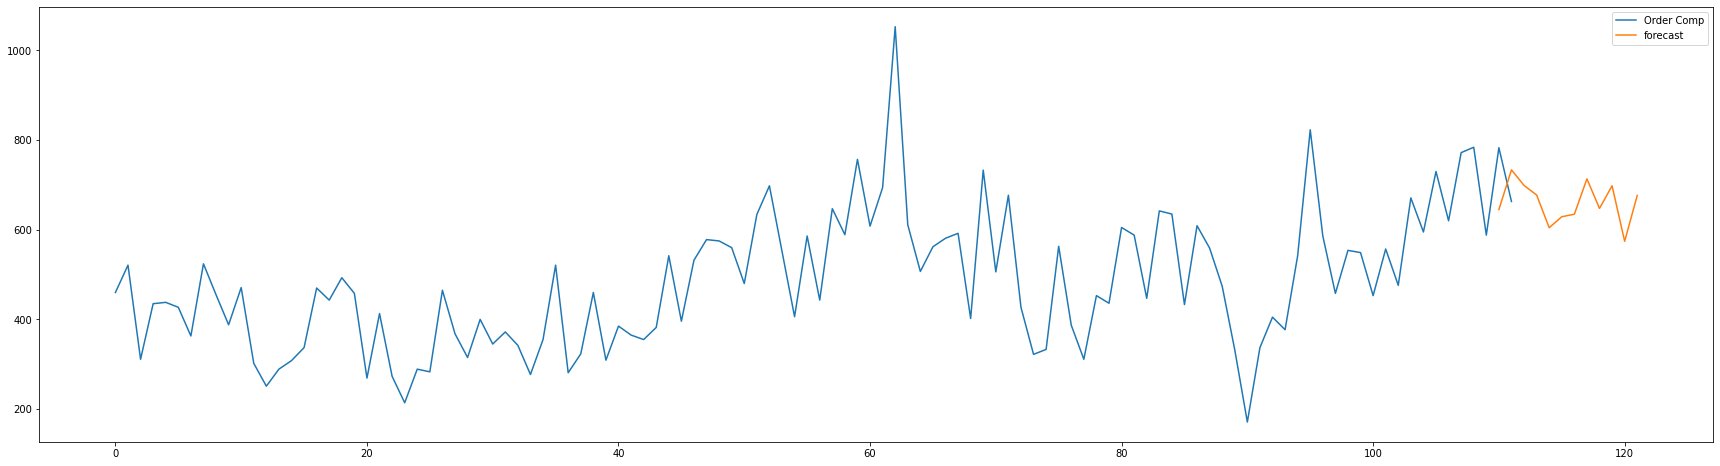

In [ ]:
future_df['forecast']=results.predict(start=
                              110,end=121,dynamic=True)
future_df[['Order Comp','forecast']].plot(figsize=(30,8))